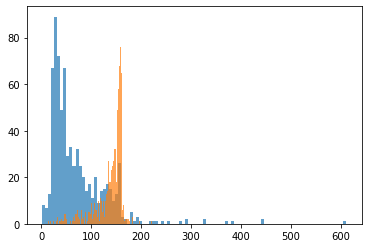

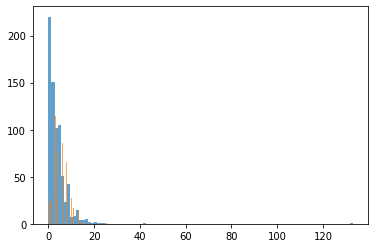

              precision    recall  f1-score   support

         ham       0.91      1.00      0.95       227
        spam       1.00      0.90      0.95       222

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449

              precision    recall  f1-score   support

         ham       0.93      0.97      0.95       227
        spam       0.97      0.93      0.95       222

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449

test data
['ham']
['ham']
['spam']
['ham']
['ham']
['spam']


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('spam.tsv', sep='\t')

df.head()

df.isna().sum()

df.tail()

df.describe()

df['label'].value_counts()/ (len(df))

df['label'].value_counts()

ham = df[df['label'] == 'ham']
spam = df[df['label'] == 'spam']

ham.shape, spam.shape

ham = ham.sample(spam.shape[0])

ham.shape, spam.shape

data = ham.append(spam, ignore_index=True)

data.shape

data['label'].value_counts()

data.head()

plt.hist(data[data['label'] == 'ham']['length'], bins = 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['length'], bins = 100, alpha = 0.7)
plt.show()

plt.hist(data[data['label'] == 'ham']['punct'], bins = 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['punct'], bins = 100, alpha = 0.7)
plt.show()

data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(data['message'], data['label'], test_size = 0.3, random_state =0, shuffle = True)

1494 * 0.3

X_train.shape

X_test.shape





from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

classifier = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", RandomForestClassifier(n_estimators=100))])

classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)

y_test, y_pred

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

accuracy_score(y_test, y_pred)

0.9465478841870824 * 449

confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))




from sklearn.svm import SVC

svm = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", SVC(C = 100, gamma='auto'))])

svm.fit(X_train, y_train)



y_pred = svm.predict(X_test)

accuracy_score(y_test, y_pred)

confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))


print('test data')

test1 = ['Hello, You are learning natural Language Processing']
test2 = ['Hope you are doing good and learning new things !']
test3 = ['Congratulations, You won a lottery ticket worth $1 Million ! To claim call on 446677']

print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict(test3))

print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))